In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import fredapi 

%matplotlib inline

In [2]:
load_dotenv("keys.txt")

True

In [3]:
fred_key = os.getenv("FRED_API_KEY")

In [4]:
print(f"Fred Key: {type(fred_key)}")

Fred Key: <class 'str'>


In [5]:
from fredapi import Fred
fred = Fred(api_key=fred_key)

In [6]:
"2015-07-14"

'2015-07-14'

In [7]:
import matplotlib.pyplot as plt

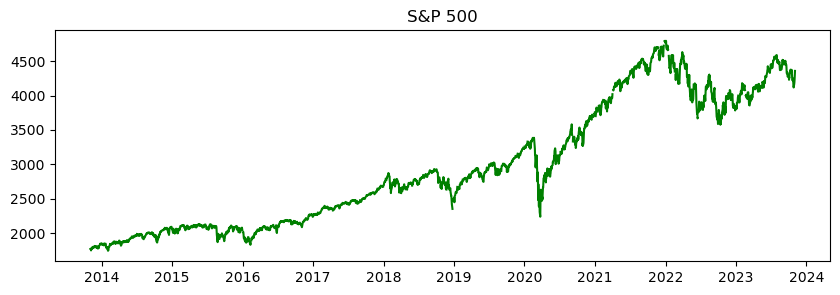

In [8]:
#Plotting S&P 500 DATA
data = fred.get_series('SP500')

plt.figure(figsize=(10,3))
plt.plot(data,'g')
plt.title('S&P 500')
plt.show()

In [11]:
gdp = fred.get_series('NGDPRSAXDCCAQ',"2020-07-16","2022-07-12") #quarterly data
gdp.dropna(axis=0,inplace=True)
gdp_df = gdp.to_frame(name='gdp')
gdp_df['day'] = gdp_df.index
gdp_df.index = [index for index in  range(len(gdp_df))]

In [12]:
gdp_df.head(10)

,gdp,day
0,504717.0,2020-07-01
1,515470.0,2020-10-01
2,522217.0,2021-01-01
3,519143.3,2021-04-01
4,526571.5,2021-07-01
5,535373.5,2021-10-01
6,538812.5,2022-01-01
7,543645.5,2022-04-01
8,546681.0,2022-07-01


In [27]:
gdp_df["datetime"] = pd.to_datetime(gdp_df["day"])

gdp_df["datetime"]

0      2013-07-15
1      2013-07-16
2      2013-07-17
3      2013-07-18
4      2013-07-19
          ...    
2513   2023-07-10
2514   2023-07-11
2515   2023-07-12
2516   2023-07-13
2517   2023-07-14
Name: datetime, Length: 2518, dtype: datetime64[ns]

In [28]:
gdp_df

,gdp,day,datetime
0,1682.50,2013-07-15,2013-07-15
1,1676.26,2013-07-16,2013-07-16
2,1680.91,2013-07-17,2013-07-17
3,1689.37,2013-07-18,2013-07-18
4,1692.09,2013-07-19,2013-07-19
...,...,...,...
2513,4409.53,2023-07-10,2023-07-10
2514,4439.26,2023-07-11,2023-07-11
2515,4472.16,2023-07-12,2023-07-12
2516,4510.04,2023-07-13,2023-07-13


In [29]:
gdp_df = gdp_df.drop(columns=["day"])
gdp_df.head()

,gdp,datetime
0,1682.50,2013-07-15
1,1676.26,2013-07-16
2,1680.91,2013-07-17
3,1689.37,2013-07-18
4,1692.09,2013-07-19


In [30]:
gdp_df.set_index(gdp_df['datetime'], inplace=True)

gdp_df

,gdp,datetime
datetime,,
2013-07-15,1682.50,2013-07-15
2013-07-16,1676.26,2013-07-16
2013-07-17,1680.91,2013-07-17
2013-07-18,1689.37,2013-07-18
2013-07-19,1692.09,2013-07-19
...,...,...
2023-07-10,4409.53,2023-07-10
2023-07-11,4439.26,2023-07-11
2023-07-12,4472.16,2023-07-12


In [31]:
gdp_df = gdp_df.drop(columns=["datetime"])
gdp_df.head()

,gdp
datetime,
2013-07-15,1682.50
2013-07-16,1676.26
2013-07-17,1680.91
2013-07-18,1689.37
2013-07-19,1692.09


In [13]:
%matplotlib inline

In [32]:
gdp_df.describe()

,gdp
count,2518.000000
mean,2877.807832
std,879.250168
min,1630.480000
25%,2089.147500
50%,2716.285000
75%,3695.100000
max,4796.560000


In [21]:
#slice data
#add coluum

In [33]:
daily_return = gdp_df.pct_change()
daily_return.tail(10)

,gdp
datetime,
2023-06-30,0.012269
2023-07-03,0.001171
2023-07-05,-0.001968
2023-07-06,-0.007923
2023-07-07,-0.002865
2023-07-10,0.002405
2023-07-11,0.006742
2023-07-12,0.007411
2023-07-13,0.008470


<Axes: xlabel='datetime'>

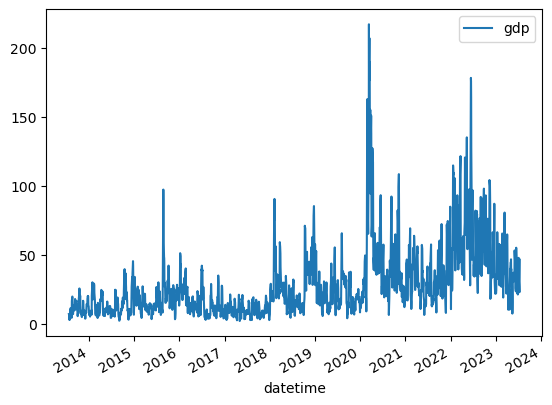

In [35]:
gdp_df.rolling(window=7).std().plot()

In [37]:
import numpy as np

In [38]:
volatility = daily_return.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

gdp    0.176762
dtype: float64

In [39]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (daily_return.mean() * 252) / (daily_return.std() * np.sqrt(252))
sharpe_ratios

gdp    0.64677
dtype: float64